<a href="https://colab.research.google.com/github/AbrarAdnan/AmbientNoise/blob/master/week_9_1_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cap Recognizer
The goal of this project is to classify 20 different types of caps / headwears commonly worn around the world. The types are following: <br/>
1. baseball cap
2. beanie cap
3. fedora cap
4. cowboy hat
5. kepi cap
6. flat cap
7. trucker cap
8. newsboy cap
9. pork pie hat
10. bowler hat
11. top hat
12. sun hat
13. boater hat
14. ivy cap
15. bucket hat
16. balaclava cap
17. turban cap
18. taqiyah cap
19. rasta cap
20. visor cap

# Setting Up Necessary Things

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [6]:
!pip install -Uqq fastai fastbook nbdev

In [7]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [9]:
from google.colab import drive
drive.mount('/content/')

ValueError: ignored

In [ ]:
%cd /content/drive/My Drive/MasterCourse/Cap Recognizer

/content/drive/My Drive/MasterCourse/Cap Recognizer


In [30]:
!zip -r '/content/cap_data.zip' '/content/data'

  adding: content/data/ (stored 0%)
  adding: content/data/visor cap/ (stored 0%)
  adding: content/data/visor cap/fbda710d-9ff3-4e99-a539-5fdf81b256d7.jpeg (deflated 17%)
  adding: content/data/visor cap/7d1be95a-e63a-4e8a-9164-459d671375d5.jpeg (deflated 0%)
  adding: content/data/visor cap/7a9a4489-77b5-4494-8ee0-39d263fc65f8.jpg (deflated 3%)
  adding: content/data/visor cap/4d23b8f6-558a-4ad3-881b-08dc6589ac76.png (deflated 3%)
  adding: content/data/visor cap/28e8c29c-da2b-436d-afd0-06a316a0ea61.jpg (deflated 4%)
  adding: content/data/visor cap/26bbe8a2-abc8-445d-9604-ebe9386a7c7c.jpg (deflated 4%)
  adding: content/data/visor cap/aadff9e1-e993-4037-8e6d-e68cc31aede1.jpg (deflated 8%)
  adding: content/data/visor cap/0bd3f772-543a-481e-be98-ac43d58b9923.jpg (deflated 10%)
  adding: content/data/visor cap/1a672aac-7d66-45da-a4d7-bfb3a5c250e5.jpg (deflated 4%)
  adding: content/data/visor cap/346e5a76-0d10-439c-9445-91a00b13c140.jpg (deflated 5%)
  adding: content/data/visor cap/2

# Download Images from Browser

You can download images from Google Image Search and Bing Image Search. You can try it out in your own time. You might need to build a scraper or use their API. <br/>

For ease, we are going to use **DuckDuckGo Image Search**. <br/>

**Good news!** Fastai has a function to do this for us.

In [10]:
doc(search_images_ddg)

In [11]:
cap_labels = [
    "baseball cap",
    "beanie cap",
    "fedora cap",
    "cowboy hat",
    "kepi cap",
    "flat cap",
    "trucker cap",
    "newsboy cap",
    "pork pie hat",
    "bowler hat",
    "top hat",
    "sun hat",
    "boater hat",
    "ivy cap",
    "bucket hat",
    "balaclava cap",
    "turban cap",
    "taqiyah cap",
    "rasta cap",
    "visor cap"
]
len(cap_labels)

20

In [12]:
images = search_images_ddg(cap_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://d0bb7f9bf11b5ad1a6b2-6175f06f5e3f64e15abbf67415a276ec.ssl.cf1.rackcdn.com/product-images/designlab/baseball-6-panel-structured-caps-cap86-red1517592215.jpg'

In [13]:
doc(download_url)

In [14]:
dest = "baseball cap.jpg"
download_url(images[0], dest, show_progress=False)

Path('baseball cap.jpg')

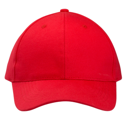

In [15]:
image = Image.open(dest)
image.to_thumb(128, 128)

## Combine all of them

In [16]:
data_path = "data"
if not os.path.exists(data_path): 
  os.mkdir(data_path)

for cap_type in cap_labels:

  dest = f"{data_path}/{cap_type}"
  if not os.path.exists(dest): 
    os.mkdir(dest)

  try:
    cap_image_urls = search_images_ddg(cap_type)
    download_images(dest, urls = cap_image_urls)
    
  except:
    continue

In [17]:
image_counts = get_image_files(data_path)
image_counts

(#3831) [Path('data/visor cap/fbda710d-9ff3-4e99-a539-5fdf81b256d7.jpeg'),Path('data/visor cap/7d1be95a-e63a-4e8a-9164-459d671375d5.jpeg'),Path('data/visor cap/7a9a4489-77b5-4494-8ee0-39d263fc65f8.jpg'),Path('data/visor cap/4d23b8f6-558a-4ad3-881b-08dc6589ac76.png'),Path('data/visor cap/965431bd-ffb8-401b-8642-e298b1f4bb1d.jpg'),Path('data/visor cap/28e8c29c-da2b-436d-afd0-06a316a0ea61.jpg'),Path('data/visor cap/26bbe8a2-abc8-445d-9604-ebe9386a7c7c.jpg'),Path('data/visor cap/aadff9e1-e993-4037-8e6d-e68cc31aede1.jpg'),Path('data/visor cap/0bd3f772-543a-481e-be98-ac43d58b9923.jpg'),Path('data/visor cap/1a672aac-7d66-45da-a4d7-bfb3a5c250e5.jpg')...]

In [18]:
failed = verify_images(image_counts)
failed

(#188) [Path('data/visor cap/965431bd-ffb8-401b-8642-e298b1f4bb1d.jpg'),Path('data/visor cap/9279d2d5-1a7c-4afa-9223-10cf4b816544.jpg'),Path('data/visor cap/31636b98-58cc-4130-9b61-f2c87acf8f44.jpg'),Path('data/visor cap/6008a01c-dcce-4408-b849-a02f5d60892b.jpg'),Path('data/visor cap/c721d315-4915-42c6-8ad2-3e6aeff8a2e2.jpg'),Path('data/visor cap/95f0cc48-b4b7-4691-a2cf-1481f423e436.jpg'),Path('data/visor cap/bb4f5067-ad49-402b-b0da-617dc96762b4.jpg'),Path('data/visor cap/d0add4b5-82a6-45e4-9023-8276f90e26fa.jpg'),Path('data/visor cap/24d652f7-e88d-4fe7-984d-4942c0b94497.jpg'),Path('data/visor cap/5f33d0b7-4b8d-408b-a43f-a3e54a0eb28b.jpg')...]

In [19]:
failed.map(Path.unlink)

(#188) [None,None,None,None,None,None,None,None,None,None...]

# From Data to Data Loaders

In [ ]:
doc(get_image_files)

In [20]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [21]:
dls = dblock.dataloaders(data_path,bs=bs)             # setting up batch size for efficient GPU use

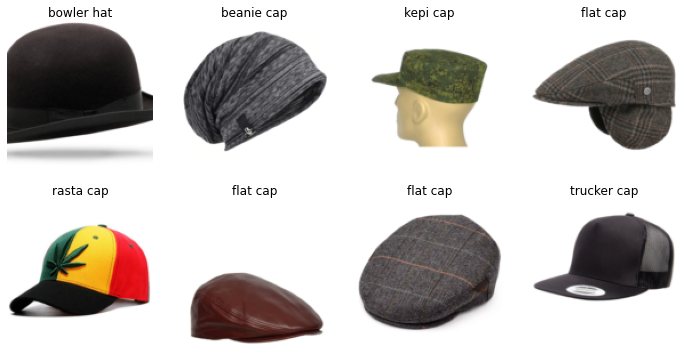

In [22]:
dls.train.show_batch(max_n=8, nrows=2)

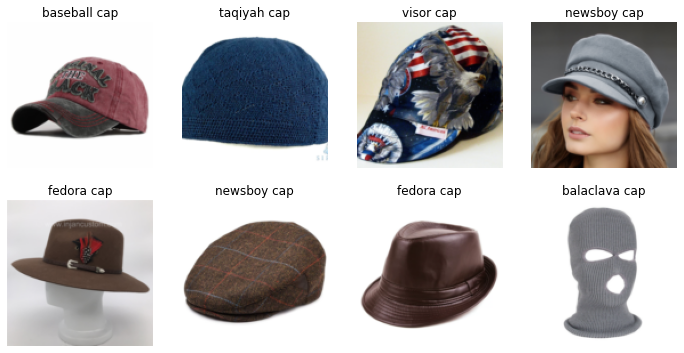

In [23]:
dls.valid.show_batch(max_n=8, nrows=2)

# Data Augmentation

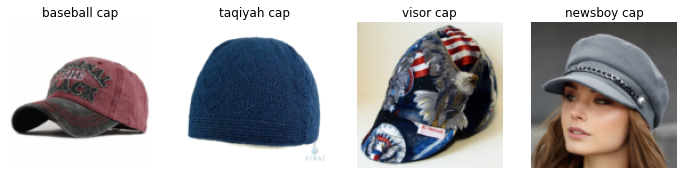

In [25]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

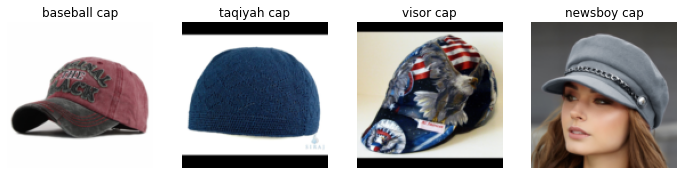

In [26]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

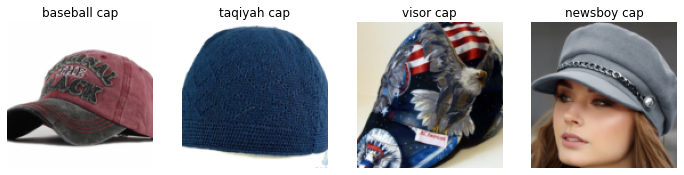

In [27]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

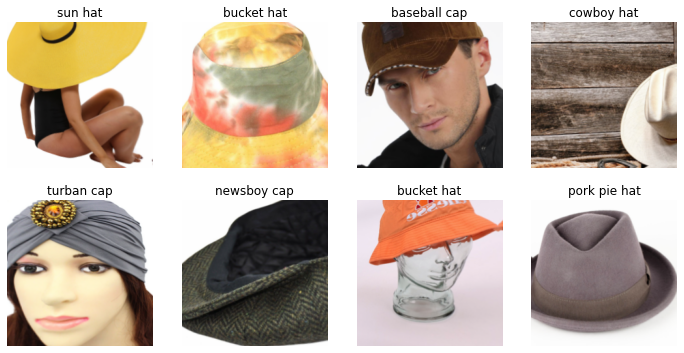

In [28]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [29]:
torch.save(dls, "cap_dataloader_v0.pkl")